# Performance Evaluation of Linear vs. Nonlinear Filters in Real-World Noise Removal
This notebook reproduces the experiments from the research paper using BSDS500 images.

In [11]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr, mean_squared_error as mse, structural_similarity as ssim
from skimage.util import random_noise
from glob import glob


In [13]:
def load_images_from_folder(folder, max_images=10):
    images = []
    image_paths = glob(os.path.join(folder, '*.jpg'))
    for i, filename in enumerate(image_paths):
        if i >= max_images:
            break
        img = cv2.imread(filename)
        if img is not None:
            images.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return images

def add_gaussian_noise(image, sigma):
    noisy = random_noise(image / 255.0, mode='gaussian', var=(sigma/255.0)**2)
    return (noisy * 255).astype(np.uint8)

def add_salt_pepper_noise(image, amount):
    noisy = random_noise(image / 255.0, mode='s&p', amount=amount)
    return (noisy * 255).astype(np.uint8)

def add_speckle_noise(image):
    noisy = random_noise(image / 255.0, mode='speckle')
    return (noisy * 255).astype(np.uint8)

def apply_mean_filter(image, ksize=3):
    return cv2.blur(image, (ksize, ksize))

def apply_median_filter(image, ksize=3):
    return cv2.medianBlur(image, ksize)

def evaluate_metrics(original, denoised):
    return {
        'PSNR': psnr(original, denoised, data_range=255),
        'MSE': mse(original, denoised),
        'SSIM': ssim(original, denoised, channel_axis=-1, data_range=255)
    }

def show_comparison(original, noisy, mean_filtered, median_filtered, title=""):
    fig, axs = plt.subplots(1, 4, figsize=(16, 4))
    axs[0].imshow(original)
    axs[0].set_title("Original")
    axs[1].imshow(noisy)
    axs[1].set_title("Noisy")
    axs[2].imshow(mean_filtered)
    axs[2].set_title("Mean Filter")
    axs[3].imshow(median_filtered)
    axs[3].set_title("Median Filter")
    for ax in axs:
        ax.axis('off')
    plt.suptitle(title)
    plt.show()


In [15]:
# Change path if needed
image_folder = "bsds500_images/images/test"
images = load_images_from_folder(image_folder, max_images=5)
print(f"Loaded {len(images)} images.")


Loaded 5 images.


Image 1


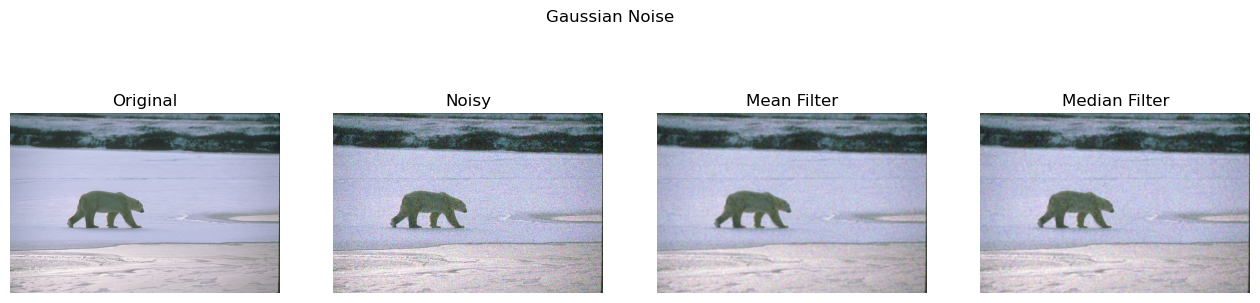

Gaussian Metrics (Mean): {'PSNR': 29.223544379571493, 'MSE': 77.75456981064458, 'SSIM': 0.6913686376228322}
Gaussian Metrics (Median): {'PSNR': 28.207532961800766, 'MSE': 98.24875702445796, 'SSIM': 0.6221498243822327}


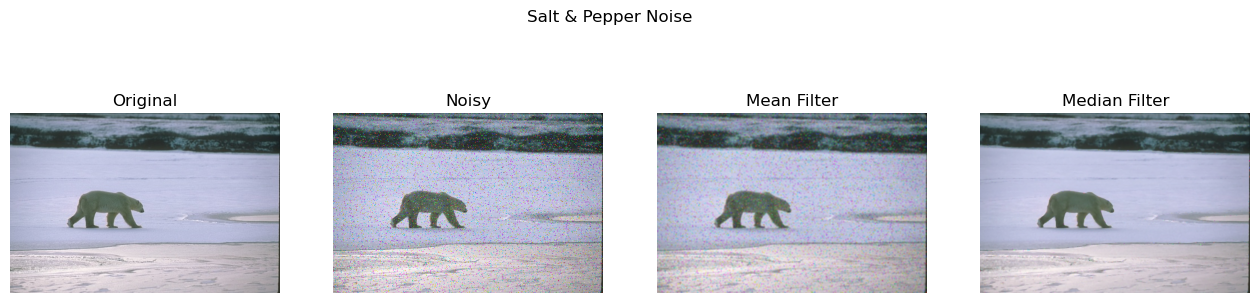

Salt & Pepper Metrics (Mean): {'PSNR': 26.01002036830575, 'MSE': 162.95898990291514, 'SSIM': 0.5629379251739267}
Salt & Pepper Metrics (Median): {'PSNR': 34.12924936829044, 'MSE': 25.127855389537633, 'SSIM': 0.910000759605987}


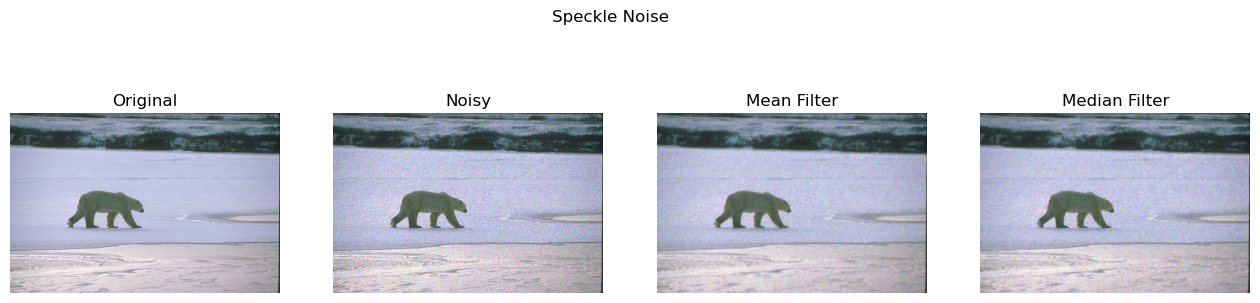

Speckle Metrics (Mean): {'PSNR': 29.78310225002653, 'MSE': 68.35497611198545, 'SSIM': 0.7187004337869851}
Speckle Metrics (Median): {'PSNR': 28.954056090611925, 'MSE': 82.73223403129946, 'SSIM': 0.6602318093370579}
Image 2


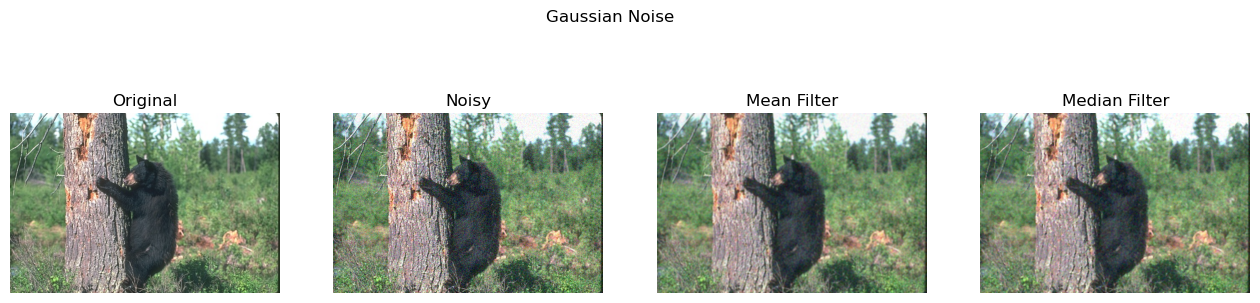

Gaussian Metrics (Mean): {'PSNR': 23.356330441586593, 'MSE': 300.2253202159744, 'SSIM': 0.7256829541538367}
Gaussian Metrics (Median): {'PSNR': 23.208621104582257, 'MSE': 310.6120146026688, 'SSIM': 0.6985057966890974}


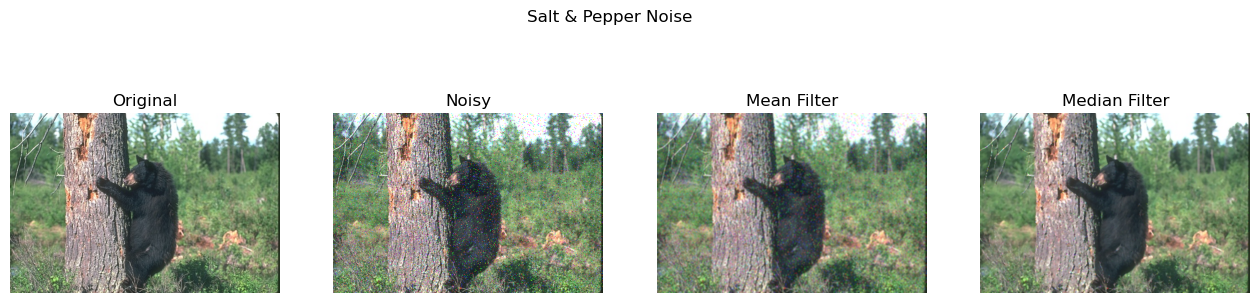

Salt & Pepper Metrics (Mean): {'PSNR': 22.42284763591815, 'MSE': 372.2164795996572, 'SSIM': 0.6478177392485551}
Salt & Pepper Metrics (Median): {'PSNR': 24.269646035231514, 'MSE': 243.2852377899107, 'SSIM': 0.8207587074434617}


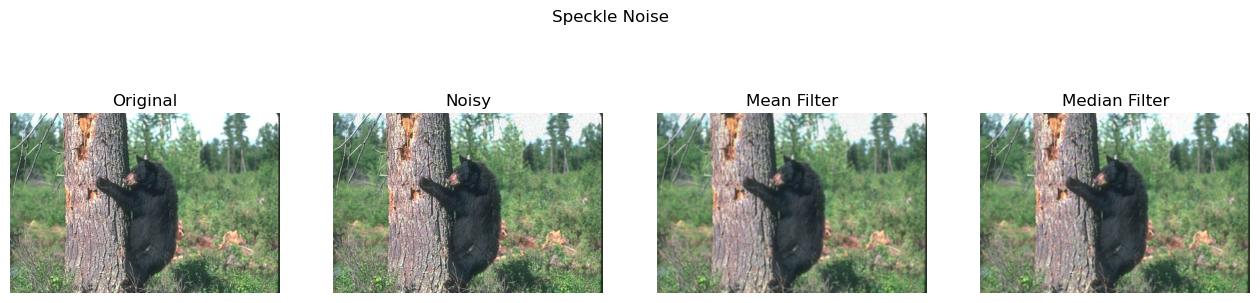

Speckle Metrics (Mean): {'PSNR': 23.71038263987098, 'MSE': 276.72098626304233, 'SSIM': 0.7757065435662337}
Speckle Metrics (Median): {'PSNR': 23.81813446659715, 'MSE': 269.9397952949355, 'SSIM': 0.7719205305682943}
Image 3


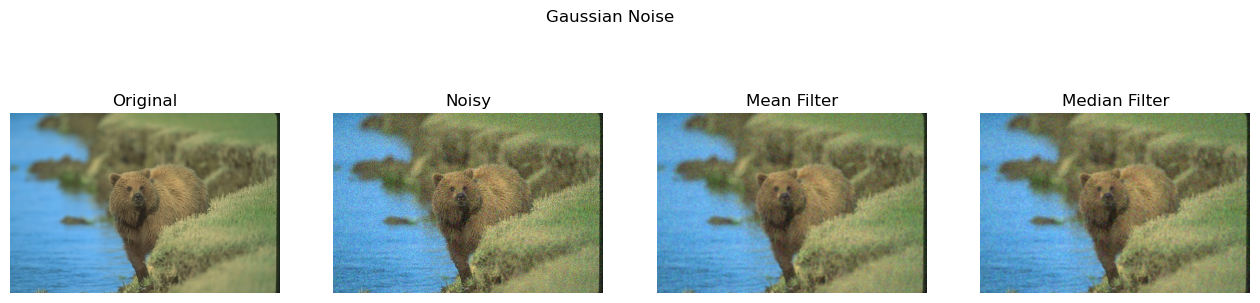

Gaussian Metrics (Mean): {'PSNR': 29.91123801898179, 'MSE': 66.36766817140649, 'SSIM': 0.6941654980517723}
Gaussian Metrics (Median): {'PSNR': 28.595944576380063, 'MSE': 89.8433429835299, 'SSIM': 0.617761086511051}


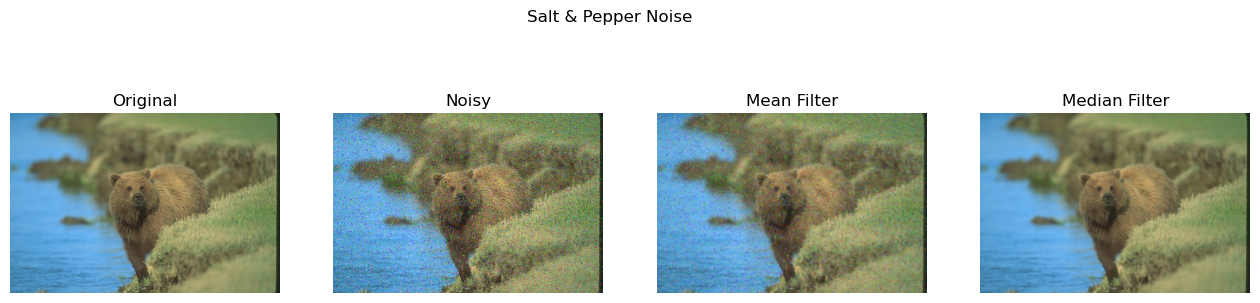

Salt & Pepper Metrics (Mean): {'PSNR': 27.023042700647974, 'MSE': 129.0553731301395, 'SSIM': 0.5675495882642154}
Salt & Pepper Metrics (Median): {'PSNR': 34.92927511676732, 'MSE': 20.900315844241078, 'SSIM': 0.9319778701167349}


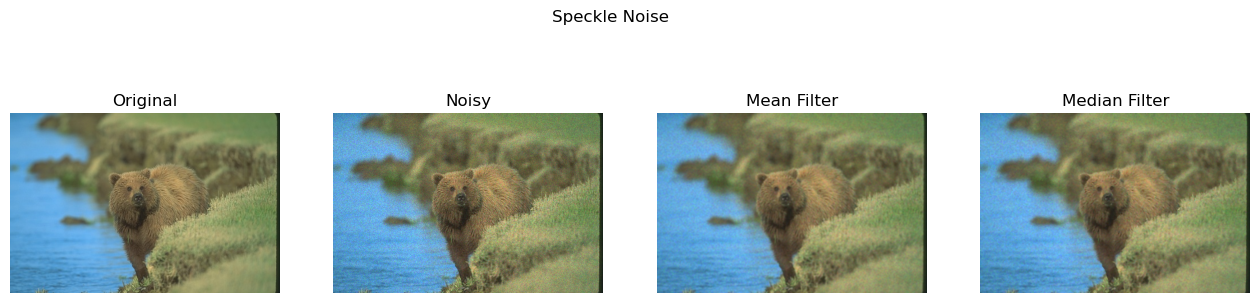

Speckle Metrics (Mean): {'PSNR': 32.09078094919693, 'MSE': 40.179290721346796, 'SSIM': 0.812775543725968}
Speckle Metrics (Median): {'PSNR': 31.16778270854038, 'MSE': 49.693786525562224, 'SSIM': 0.7663498548291323}
Image 4


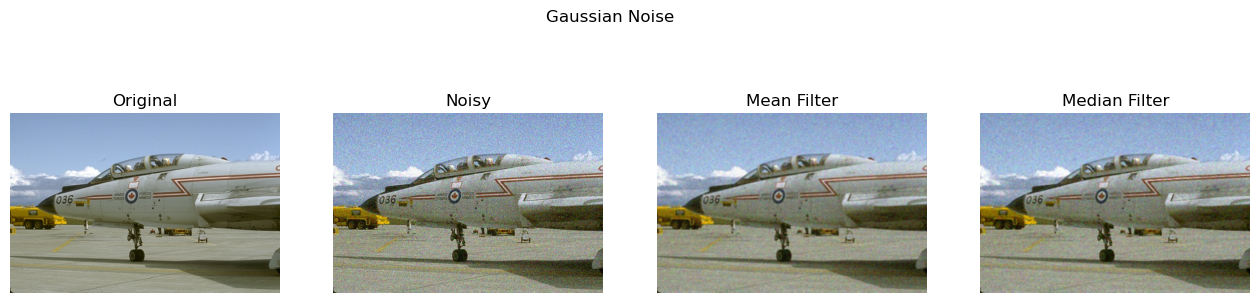

Gaussian Metrics (Mean): {'PSNR': 28.019586136850112, 'MSE': 102.5939490892762, 'SSIM': 0.6882068442676333}
Gaussian Metrics (Median): {'PSNR': 27.545170241393954, 'MSE': 114.43617593150303, 'SSIM': 0.6284515119314409}


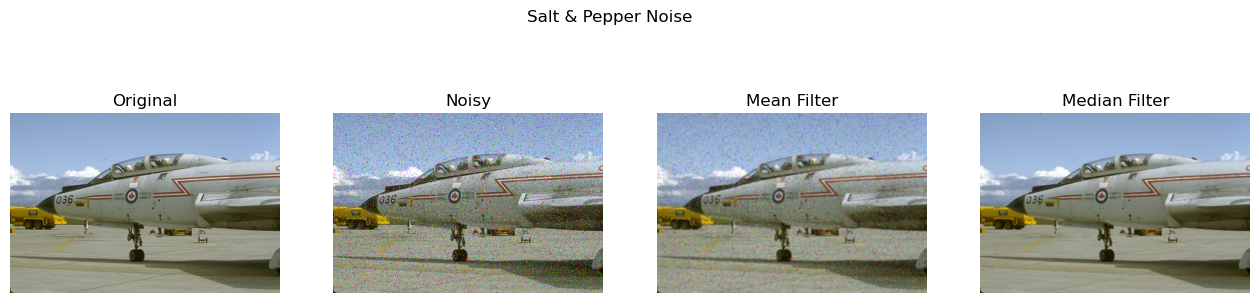

Salt & Pepper Metrics (Mean): {'PSNR': 25.762913783176714, 'MSE': 172.49995358406574, 'SSIM': 0.573782773040439}
Salt & Pepper Metrics (Median): {'PSNR': 32.026324575009156, 'MSE': 40.78006403240048, 'SSIM': 0.9200149703207338}


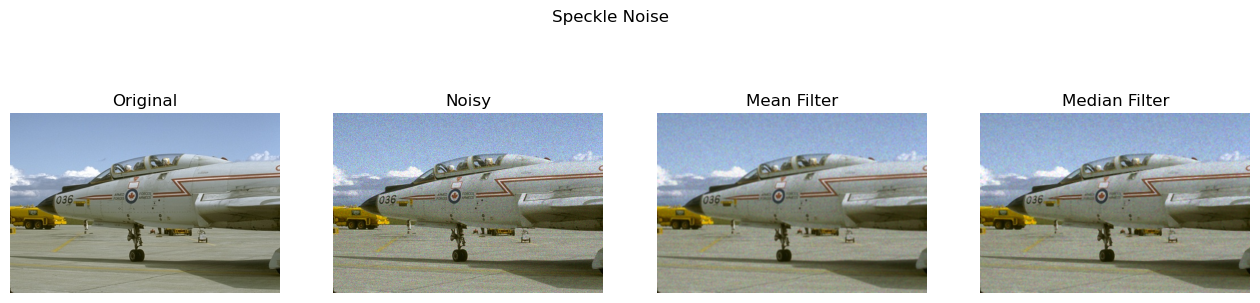

Speckle Metrics (Mean): {'PSNR': 28.95478666597981, 'MSE': 82.71831788654218, 'SSIM': 0.7561286714862613}
Speckle Metrics (Median): {'PSNR': 29.087171431755966, 'MSE': 80.2348818984333, 'SSIM': 0.7160909953932778}
Image 5


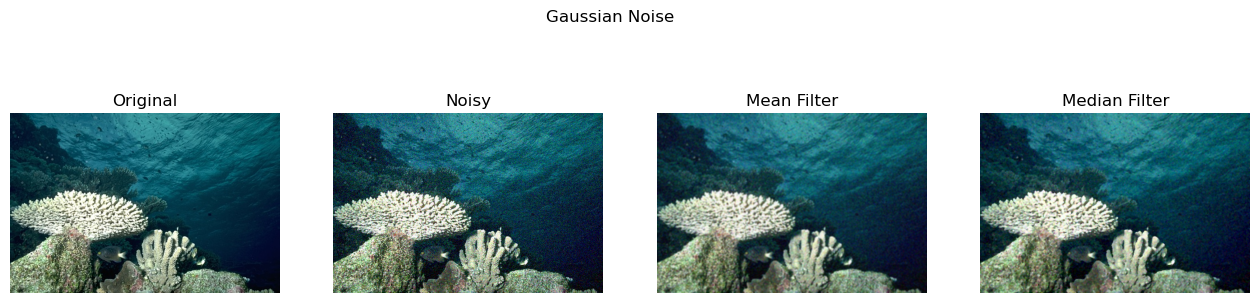

Gaussian Metrics (Mean): {'PSNR': 23.51574004274984, 'MSE': 289.40521758278766, 'SSIM': 0.6583689150154524}
Gaussian Metrics (Median): {'PSNR': 23.528565841625657, 'MSE': 288.551792626559, 'SSIM': 0.6421479651486804}


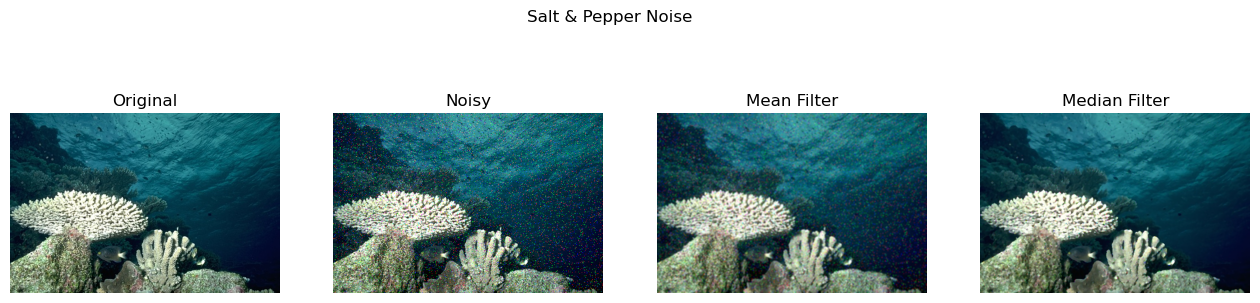

Salt & Pepper Metrics (Mean): {'PSNR': 22.223678533795347, 'MSE': 389.68393987085574, 'SSIM': 0.55718913257803}
Salt & Pepper Metrics (Median): {'PSNR': 24.532363666047768, 'MSE': 229.00448831289953, 'SSIM': 0.8317988737588372}


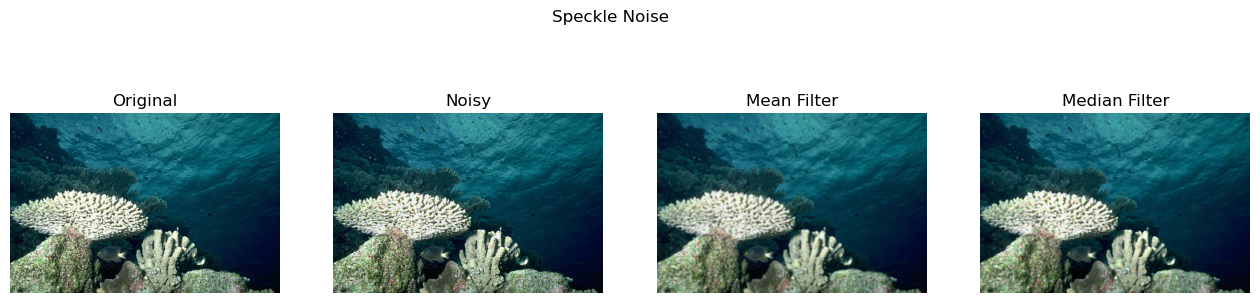

Speckle Metrics (Mean): {'PSNR': 24.05533002468839, 'MSE': 255.5920600686956, 'SSIM': 0.7985546652536804}
Speckle Metrics (Median): {'PSNR': 24.339069381155745, 'MSE': 239.42716476361335, 'SSIM': 0.800899727505301}


In [17]:
# Apply noise and filtering
sigmas = [20]  # Gaussian
amounts = [0.05]  # Salt & Pepper

for idx, img in enumerate(images):
    print(f"Image {idx + 1}")

    # Gaussian noise
    noisy_g = add_gaussian_noise(img, sigma=20)
    mean_g = apply_mean_filter(noisy_g)
    median_g = apply_median_filter(noisy_g)
    show_comparison(img, noisy_g, mean_g, median_g, title="Gaussian Noise")
    print("Gaussian Metrics (Mean):", evaluate_metrics(img, mean_g))
    print("Gaussian Metrics (Median):", evaluate_metrics(img, median_g))

    # Salt & Pepper noise
    noisy_sp = add_salt_pepper_noise(img, amount=0.05)
    mean_sp = apply_mean_filter(noisy_sp)
    median_sp = apply_median_filter(noisy_sp)
    show_comparison(img, noisy_sp, mean_sp, median_sp, title="Salt & Pepper Noise")
    print("Salt & Pepper Metrics (Mean):", evaluate_metrics(img, mean_sp))
    print("Salt & Pepper Metrics (Median):", evaluate_metrics(img, median_sp))

    # Speckle noise
    noisy_speckle = add_speckle_noise(img)
    mean_speckle = apply_mean_filter(noisy_speckle)
    median_speckle = apply_median_filter(noisy_speckle)
    show_comparison(img, noisy_speckle, mean_speckle, median_speckle, title="Speckle Noise")
    print("Speckle Metrics (Mean):", evaluate_metrics(img, mean_speckle))
    print("Speckle Metrics (Median):", evaluate_metrics(img, median_speckle))
